Production cross sections in leptophobic Zp process
====

Files were generated with g=0.4

In [192]:
#!ls /project/HEP_EF/B2G/ZP_Runs

In [193]:
import ROOT as R
import numpy as np
import os
from os.path import exists
from subprocess import check_output
import numpy as np

In [194]:
R.gStyle.SetOptStat(0)

In [195]:
data = np.loadtxt("XS.table")
runs1 = np.array([x for x in data if x[2] == 1])
runs200 = np.array([x for x in data if x[2] == 200])
CScorr = 2.0 / 0.03366 / .575# CC correction, Z->mm BF, H->bb BF

In [196]:
gr1 = R.TGraph2D()
gr1.SetTitle("NS=1 Cross Sections;mZp;mNd;XS (pb)")
N=0
for run in runs1:
    mzp=run[0]
    mnd=run[1]
    gr1.SetPoint(N,mzp,mnd,run[3]*CScorr)
    N=N+1

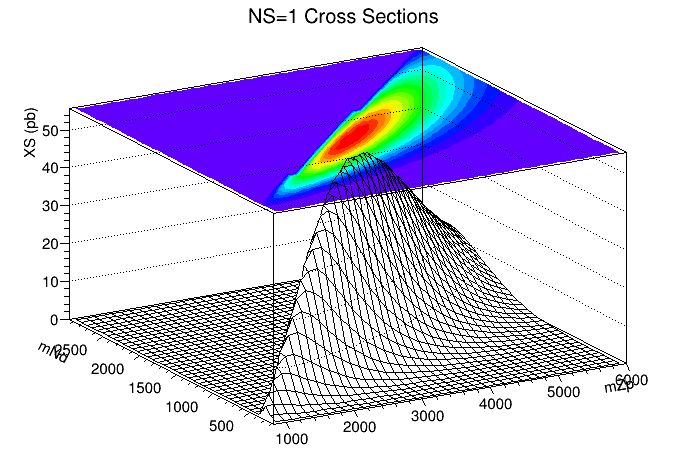

In [197]:
%jsroot off
R.gStyle.SetPalette(1)
gr1.SetMarkerStyle(20)
tc=R.TCanvas()
gr1.Draw("surf3")
tc.Draw()

How do we generate limits plots of the form in  [SUS-21-009](https://twiki.cern.ch/twiki/bin/view/CMSPublic/PhysicsResultsSUS#Run_2_Results_13_TeV)?

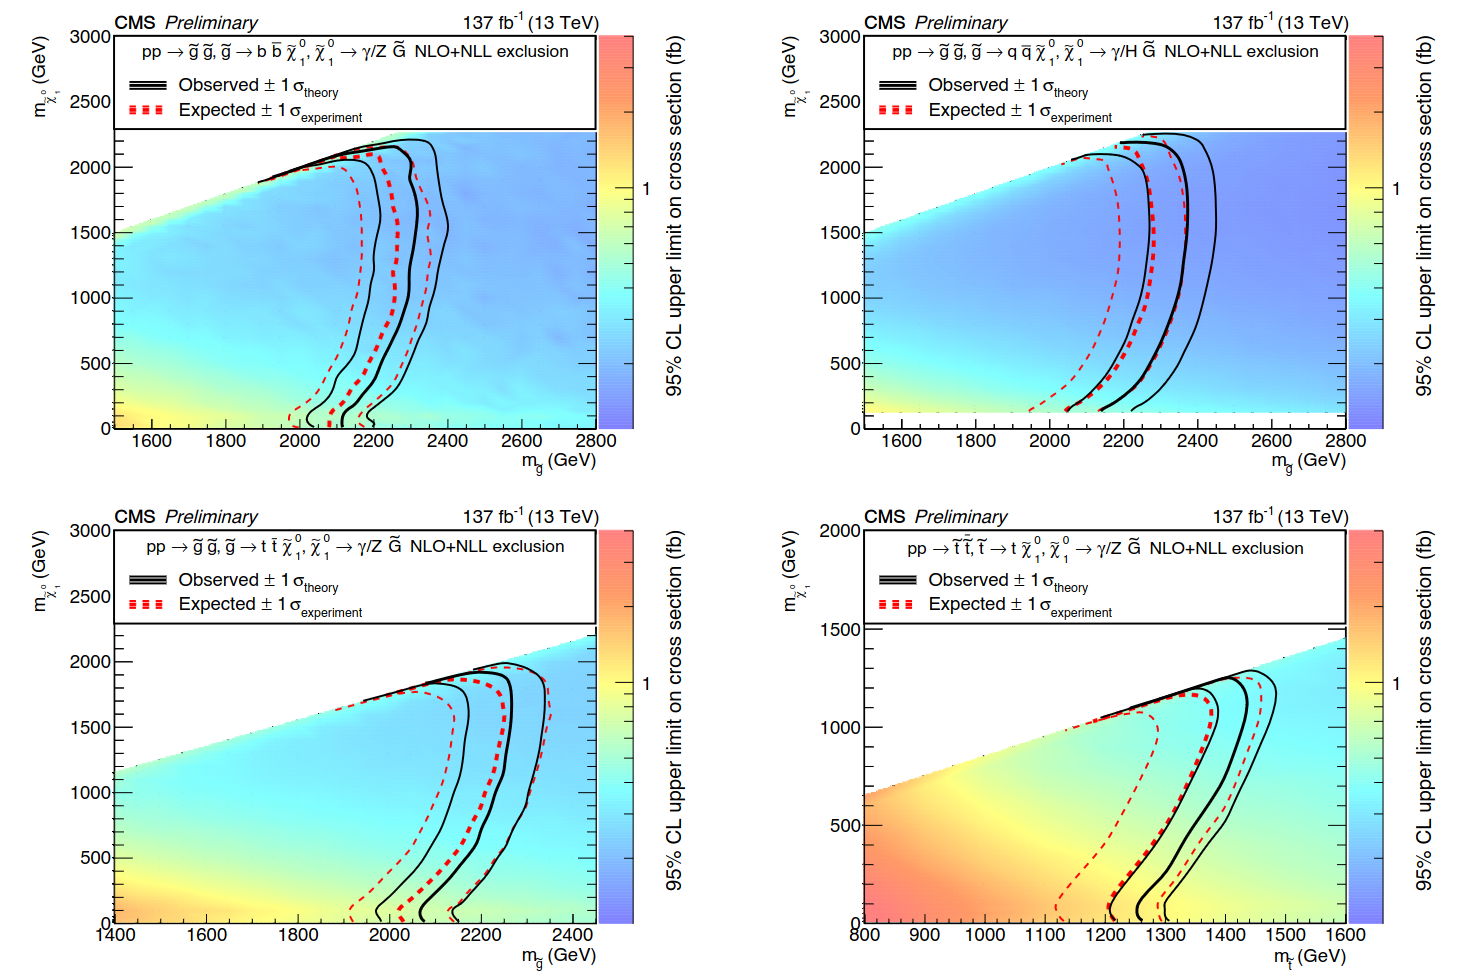

In [198]:
gr200 = R.TGraph2D()
N=0
ggen=0.4
g=0.4
for run in runs200:
    mzp=run[0]
    mnd=run[1]
    if mnd>1800: continue
    gr200.SetPoint(N,mzp,mnd,run[3]*(g/ggen)**4*CScorr)
    N=N+1
gr200.SetTitle(f"NS=200 Cross Sections g={g};mZp;mNd;XS (pb)")

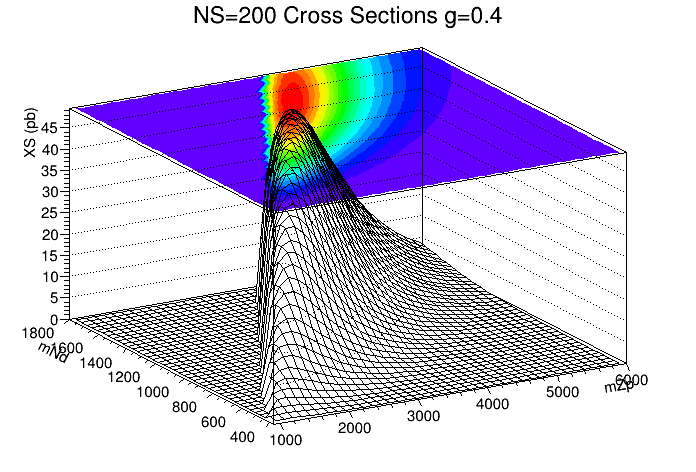

In [199]:
%jsroot off
tc=R.TCanvas()
gr200.Draw("surf3")
tc.Draw()

In [200]:
tf=R.TFile("anomCS.root","recreate")
gr1.Write("gr1")
gr200.Write("gr200")
tf.Close()

Make some 2d exclusion lines based on expected limits

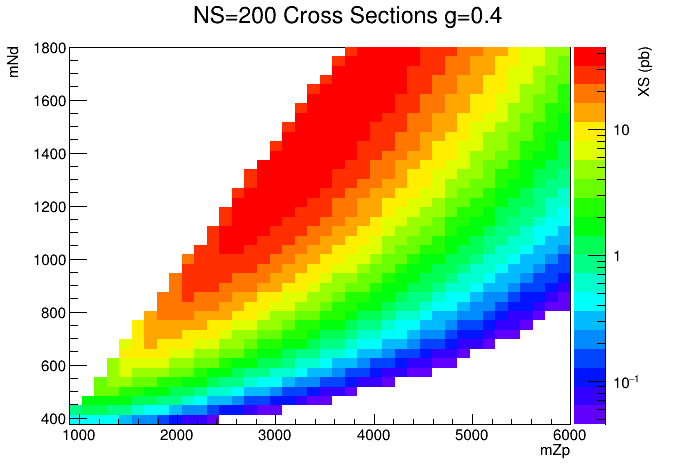

In [201]:
%jsroot off
tc=R.TCanvas()
tc.Divide(1,1)
gr200.Draw("colz")
tc.SetRightMargin(0.18)
R.gPad.SetLogz()
tc.Draw()

Expected limits NS=200 (placeholder)

In [202]:
minlim=1

def fill(h,g,x,y,z):
    global minlim
    h.Fill(x,y,z)
    g.SetPoint(g.GetN(),x,y,z)
    if z<minlim: minlim=z

Warning in <TROOT::Append>: Replacing existing TH1: hexp (Potential memory leak).


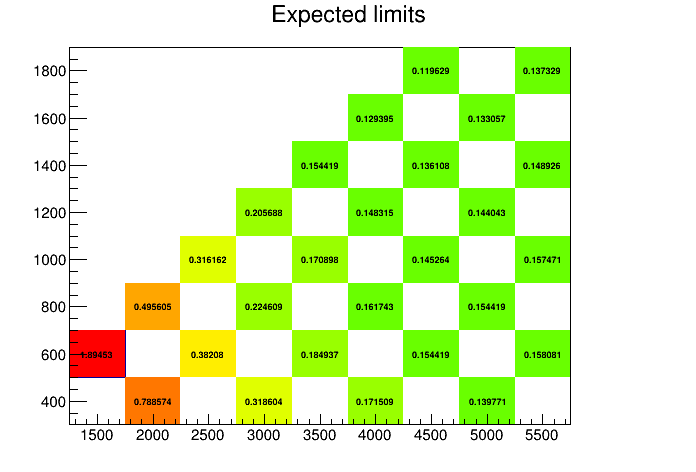

In [203]:
hexp=R.TH2F("hexp","Expected limits",9,1250,5750,8,300,1900)
gexp=R.TGraph2D()

fill(hexp,gexp,1500,600,1.89453)

fill(hexp,gexp,2000,400,0.788574)
fill(hexp,gexp,2000,800,0.495605)

fill(hexp,gexp,2500,600,0.38208)
fill(hexp,gexp,2500,1000,0.316162)

fill(hexp,gexp,3000,400,.318604)
fill(hexp,gexp,3000,800,.224609)
fill(hexp,gexp,3000,1200,.205688)

fill(hexp,gexp,3500,600,.184937)
fill(hexp,gexp,3500,1000,.170898)
fill(hexp,gexp,3500,1400,.154419)

fill(hexp,gexp,4000,400,.171509)
fill(hexp,gexp,4000,800,.161743)
fill(hexp,gexp,4000,1200,.148315)
fill(hexp,gexp,4000,1600,.129395)

fill(hexp,gexp,4500,600,.154419)
fill(hexp,gexp,4500,1000,.145264)
fill(hexp,gexp,4500,1400,.136108)        
fill(hexp,gexp,4500,1800,.119629)        

fill(hexp,gexp,5000,400,.139771)
fill(hexp,gexp,5000,800,.154419)
fill(hexp,gexp,5000,1200,.144043)
fill(hexp,gexp,5000,1600,.133057)
          
fill(hexp,gexp,5500,600,.158081)
fill(hexp,gexp,5500,1000,.157471)
fill(hexp,gexp,5500,1400,.148926)        
fill(hexp,gexp,5500,1800,.137329)         

hexp.Draw("text,box,col")
tc.Draw()

Make a smooth histogram of the expected limits

In [204]:
# needed or plot is messed up
%jsroot on  
tc2=R.TCanvas()

hexp2=R.TH2F("hexp2","Expected limits",90,1250,5750,80,300,1900)

xs=np.linspace(1250+25,5750-25,90)
ys=np.linspace(300+20,1900-20,79)

for x in xs:
    for y in ys:
        z=gexp.Interpolate(x,y)
        if z>=minlim:
            hexp2.Fill(x,y,z)
        
hexp2.SetMinimum(0.1)
hexp2.Draw("box,colz")
R.gPad.SetLogz()
tc2.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hexp2 (Potential memory leak).


Make cross section using the same binning

In [205]:
hCS=R.TH2F("hCS",f"Cross sections g={g}",90,1250,5750,80,300,1900)
for x in xs:
    for y in ys:
        z=gr200.Interpolate(x,y)
        if z>0: hCS.Fill(x,y,z)
        #print(x,y,z)
        
R.gPad.SetLogz()
hCS.Draw("box,colz")
tc2.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hCS (Potential memory leak).


In [206]:
#plot limit-CS
hdiff=hCS.Clone("hdiff")
hdiff.Reset()
hdiff.SetTitle(f"Limit Contour Z'->NdNd->NsH,NsZ, Nd=200 g={g}")
for i in range( hdiff.GetNbinsX()*hdiff.GetNbinsY() ):
    if hexp2.GetBinContent(i) == 0: continue
    if hCS.GetBinContent(i) - hexp2.GetBinContent(i) > 0.001: hdiff.SetBinContent(i,1)  #excluded
    elif hexp2.GetBinContent(i)>0: hdiff.SetBinContent(i,-1)
hdiff.Draw("box,colz")
R.gPad.SetLogz(0)
tc2.Draw()

In [207]:
#plot limit-CS
g=.2
hdiff=hCS.Clone("hdiff")
hCStmp=hCS.Clone("hCStmp")
hCStmp.Scale((g/ggen)**4)
hdiff.Reset()
hdiff.SetTitle(f"Limit Contour Z'->NdNd->NsH,NsZ, Nd=200 g={g}")
for i in range( hdiff.GetNbinsX()*hdiff.GetNbinsY() ):
    if hexp2.GetBinContent(i) == 0: continue
    if hCStmp.GetBinContent(i) - hexp2.GetBinContent(i) > 0.001: hdiff.SetBinContent(i,1)  #excluded
    elif hexp2.GetBinContent(i)>0: hdiff.SetBinContent(i,-1)
hdiff.Draw("box,colz")
R.gPad.SetLogz(0)
tc2.Draw()

In [210]:
#plot limit-CS
g=.1
hdiff=hCS.Clone("hdiff")
hCStmp=hCS.Clone("hCStmp")
hCStmp.Scale((g/ggen)**4)
hdiff.Reset()
hdiff.SetTitle(f"Limit Contour Z'->NdNd->NsH,NsZ, Nd=200 g={g}")
for i in range( hdiff.GetNbinsX()*hdiff.GetNbinsY() ):
    if hexp2.GetBinContent(i) == 0: continue
    if hCStmp.GetBinContent(i) - hexp2.GetBinContent(i) > 0.001: hdiff.SetBinContent(i,1)  #excluded
    elif hexp2.GetBinContent(i)>0: hdiff.SetBinContent(i,-1)
hdiff.Draw("box,colz")
R.gPad.SetLogz(0)
tc2.Draw()